In [1]:
from common import *

mser = cv2.MSER_create()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [2]:
# coordinates, bboxes = mser.detectRegions(gray)
# for bbox in bboxes:
#     x, y, w, h = bbox
#     cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
# cv2.imwrite(f'results/mser_subresult_of_{name}',img)

In [3]:
coordinates, bboxes = mser.detectRegions(gray)
bboxes_list = list()
heights = list()
for bbox in bboxes:
    x, y, w, h = bbox
    # bbox containing the left-top and right-bottom coordinates
    bboxes_list.append([x, y, x + w, y + h])
    heights.append(h)
heights = sorted(heights)

# Find half of the median height
median_height = heights[len(heights) //2]/ 2  

In [4]:
def grouper(iterable, interval=2):
    prev = None
    group = []
    for item in iterable:
        if not prev or abs(item[1] - prev[1]) <= interval:
            group.append(item)
        else:
            yield group
            group = [item]
        prev = item
    if group:
        yield group

6


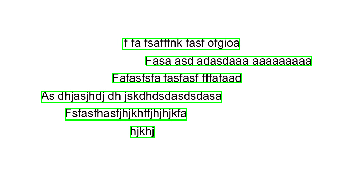

True

In [5]:
bboxes_list = sorted(bboxes_list, key=lambda k: k[1])

combined_bboxes = grouper(bboxes_list, median_height)
rects = []
for group in combined_bboxes:
    x_min = min(group, key=lambda k: k[0])[0]  # Find min of x1
    x_max = max(group, key=lambda k: k[2])[2]  # Find max of x2
    y_min = min(group, key=lambda k: k[1])[1]  # Find min of y1
    y_max = max(group, key=lambda k: k[3])[3]  # Find max of y2
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    rect = ((x_max,y_min),(x_min,y_min),(x_min,y_max),(x_max,y_max))
    rects.append(rect)
    
total_height = 0
for i in rects:
    total_height += (i[2][1] - i[1][1])
arv_height = total_height/len(rects)    
for i in rects:
    if (i[2][1] - i[1][1]) < 0.7*arv_height:
        rects.remove(i)
print(len(rects))
rects = np.array(tuple(rects))
show(img)
cv2.imwrite(f'results/mser_result_of_{name}',img)

In [6]:
rect_dict={}

for i in range(len(rects)):
    rect_dict[f'r{i+1}'] = Rect(rects[i],f'line{i+1}')
for i in rect_dict.values():
    print(i.start,i.end,i.height)


rect_list = []
for i in range(len(rect_dict)):
    rect_list.append(rect_dict[f'r{i+1}'])


334 676 33
403 885 26
307 680 26
99 624 33
169 522 33
359 427 33


In [7]:
# when only condsider two neighbor lines
# Print ralationships description by language and relationships 1-dim array
array = []
for i in range(len(rect_list)-1):
    num,res = Rect.relationship(rect_list[i],rect_list[i+1])
    if num!= 0:
        array.append(num)
    print(res)
print(array)

2.1)line1 overlaps the start of line2
3.1)line2 overlaps the end of line3
3.1)line3 overlaps the end of line4
2.4)line4 covers line5
2.4)line5 covers line6
[4, 9, 9, 7, 7]


In [8]:
# when condsider ralations of each two lines
# Print ralationships description by language
twoD_list = []
for i in range(len(rect_list)):
    array = []
    for j in range(len(rect_list)):  
#         if j != i:
        num,res = Rect.relationship(rect_list[i],rect_list[j])
        array.append(num)
        print(res)
    twoD_list.append(array)
# print(twoD_list)

****line1 is not above the line1
2.1)line1 overlaps the start of line2
3.3)line1 ends with but starts after line3
3.1)line1 overlaps the end of line4
3.1)line1 overlaps the end of line5
2.4)line1 covers line6
****line2 is not above the line1
****line2 is not above the line2
3.1)line2 overlaps the end of line3
3.1)line2 overlaps the end of line4
3.1)line2 overlaps the end of line5
3.1)line2 overlaps the end of line6
****line3 is not above the line1
****line3 is not above the line2
****line3 is not above the line3
3.1)line3 overlaps the end of line4
3.1)line3 overlaps the end of line5
2.4)line3 covers line6
****line4 is not above the line1
****line4 is not above the line2
****line4 is not above the line3
****line4 is not above the line4
2.4)line4 covers line5
2.4)line4 covers line6
****line5 is not above the line1
****line5 is not above the line2
****line5 is not above the line3
****line5 is not above the line4
****line5 is not above the line5
2.4)line5 covers line6
****line6 is not abov

In [9]:
# Print relationships 2-dim array
twoD_array = np.array(twoD_list)
print(twoD_array)
print(twoD_array.shape)

[[ 0  4 11  9  9  7]
 [ 0  0  9  9  9  9]
 [ 0  0  0  9  9  7]
 [ 0  0  0  0  7  7]
 [ 0  0  0  0  0  7]
 [ 0  0  0  0  0  0]]
(6, 6)
